# AI Computer Assignment 0
Mohammad Saadati - 
_810198410_

## Introduction
The goal of this computer assignment is getting more familiar with python libraries such as numpy, pandas, and matplotlib that will help us in learning Artificial Intelligence. At the end of this project we get familiar with a simple Classification model.

## Import Libraries
First of all, we import necessary libraries to use their functions.

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy.stats import norm
from shapely.geometry import LineString

### Question 1
First we load csv file as a DataFrame using pandas library.

In [297]:
df = pd.read_csv("bank_term_deposit.csv")
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no


The head() function returns the first 5(by default 5) rows of df(DataFrame) and its header.

In [298]:
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


The tail() function returns the last 5(by default 5) rows of df(DataFrame) and its header.

In [299]:
df.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


The describe() function returns descriptive statistics for every column of df(DataFrame).

In [300]:
df.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


The info() function returns a summary of df(DataFrame) including data type and non-null values count of each column and also memory usage.

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


### Question 2

The info() function returns a summary of df(DataFrame) including data type and non-null values count of each column and also memory usage.

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


Now use replace() function to convert categorical data to numerical data.

In [303]:
df = df.replace({"marital": { "divorced": 0, "single": 1, "married": 2}})
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,2.0,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,2.0,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,1.0,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,2.0,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,2.0,secondary,NaN,yes,no,226.0,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,2.0,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,2.0,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,2.0,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,2.0,secondary,1137.0,no,no,129.0,4,211,other,no


### Question 3
In this part first we use two Pandas function (isna and sum) to count number of missing values at each column.

In [304]:
df.isna().sum()

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

Now use fillna function to fill out the missing values in the given column.

In [305]:
df['age'] = df['age'].fillna(df['age'].mean())
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])
df['balance'] = df['balance'].fillna(df['balance'].mean())
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mean())
df.isna().sum()

age            0
job            0
marital        0
education      0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

#### Advantages and disadvantages of using mean for missing values:

Missing values in your data do not reduce your sample size, as it would be the case with listwise deletion (the default of many statistical software packages, e.g. R, Stata, SAS or SPSS). Since mean imputation replaces all missing values, you can keep your whole database.

Replacing missing data by the mean of nonmissing data causes the population SD to be underestimated, but may also obscure important features of the population from which the data were sampled.
Another possible disadvantage with using the mean for missing values is that the reason the values are missing in the first place could be dependent on the missing values themselves. (This is called missing not at random.)

Advantages : Easy to apply - Mean will not change

Disadvantages : Results may not be accurate - For large amount of NaN data this method can increase mod value significantly and cause error in results - The variance will decrease

Finally we separate rows whose `y` column value is NaN from the original DataFrame and save it in a new DataFrame.

In [306]:
NaN_df = df.copy()
NaN_df = NaN_df.loc[NaN_df['y'].isnull()]
NaN_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,2.0,tertiary,1235.0,no,no,354.00000,3,-1,unknown,NaN
38,33.00000,management,2.0,secondary,3935.0,yes,no,765.00000,1,342,failure,NaN
54,41.61747,blue-collar,2.0,secondary,2231.0,yes,no,272.00000,3,-1,unknown,NaN
65,51.00000,blue-collar,0.0,secondary,23.0,yes,no,134.00000,1,170,failure,NaN
89,41.61747,blue-collar,2.0,secondary,1831.0,yes,no,203.00000,2,-1,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,1.0,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,NaN
4471,59.00000,management,2.0,unknown,3534.0,no,no,216.00000,4,-1,unknown,NaN
4473,33.00000,technician,2.0,secondary,479.0,yes,no,137.00000,1,272,failure,NaN
4477,32.00000,management,1.0,tertiary,577.0,no,no,101.00000,2,-1,unknown,NaN


In [307]:
df = df[df['y'].notna()]
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,2.0,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,2.0,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,1.0,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,2.0,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,2.0,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,2.0,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,2.0,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,2.0,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,2.0,secondary,1137.00000,no,no,129.00000,4,211,other,no


### Question 4
Now we use *value_counts()* function to show how many users have a home loan and how many do not. We also show how many time deposits they have registered and how many have not registered.

In [308]:
print(df['housing'].value_counts())

yes    2389
no     1698
Name: housing, dtype: int64


In [309]:
print(df['y'].value_counts())

no     3623
yes     464
Name: y, dtype: int64


### Question 5
In this part we count number of user with `age` greater than 35 and `marital` equal to 1 and `poutcome` equal to success.

In [310]:
# df[(df['age'] > 35) & (df['marital'] == 1) & (df['poutcome'] == 'success')]
# print(len(df[(df['age'] > 35) & (df['marital'] == 1) & (df['poutcome'] == 'success')]))
number_of_users, _ = df[(df['age'] > 35) & (df['marital'] == 1) & (df['poutcome'] == 'success')].shape
number_of_users

14

### Question 6
Now we find the average annual account balance of customers with secondary education status.

In [311]:
t1 = time.time()
print(df[(df['education'] == 'secondary')]['balance'].mean())
t2 = time.time()
print('mean time with vectorization: %f ' % ((t2 - t1)))

950.7017237980879
mean time with vectorization: 0.013142 


### Question 7
We do the previous part again without using vectorization and using the loop and compare the execution times of the two methods.

In [312]:
sum1 = 0
count1 = 0
mean1 = 0
t5 = time.time()

for index, row in df[(df['education'] == 'secondary')].iterrows():
    sum1 += row['balance']
    count1 += 1

if count1 > 0:
    mean1 = sum1 / count1
    
t6 = time.time()

print(mean1)
print('mean time with loop: %f ' % ((t6 - t5)))

950.7017237980879
mean time with loop: 1.271128 


In [313]:
print('mean time with vectorization: %f ' % ((t2 - t1)))
print('mean time with loop: %f ' % ((t6 - t5)))

mean time with vectorization: 0.013142 
mean time with loop: 1.271128 


As can be seen, the loop averaging operation is slower than the vectorization averaging operation.

### Question 8
In this part we use Pandas hist() function to draw histogram of each column.

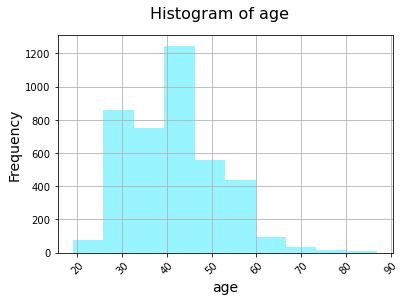

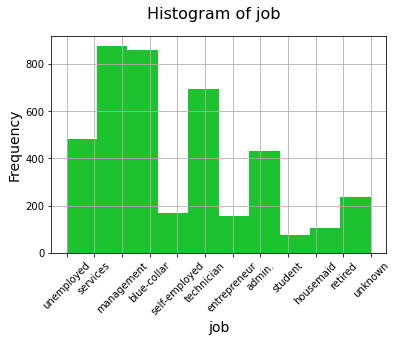

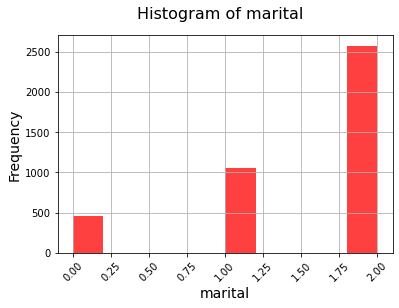

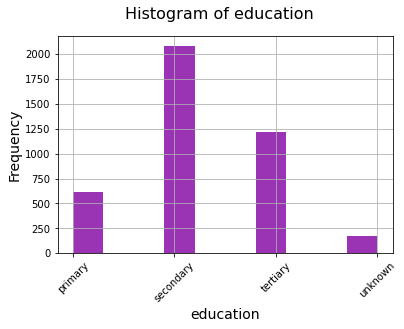

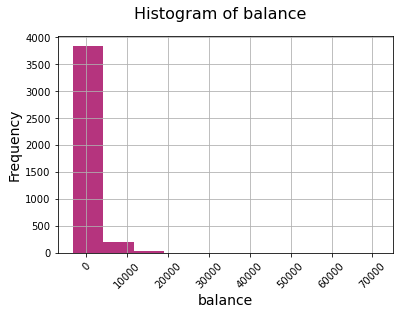

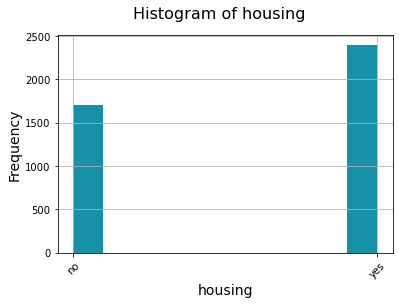

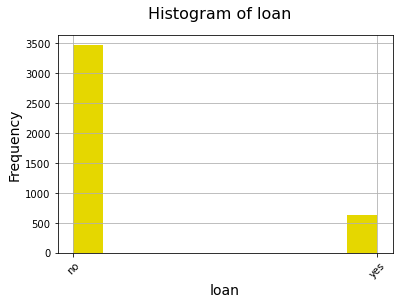

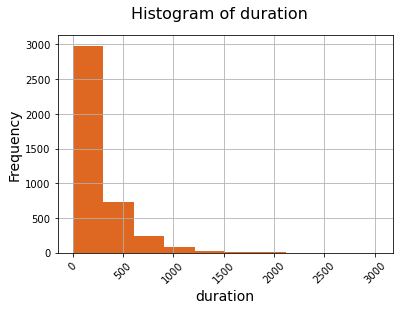

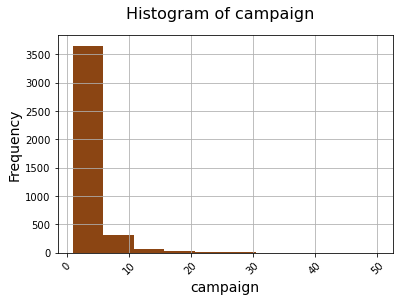

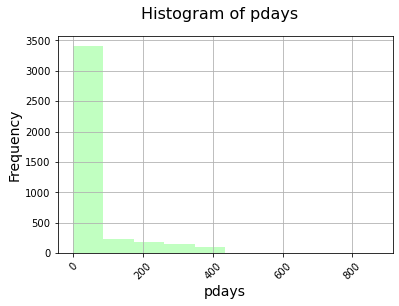

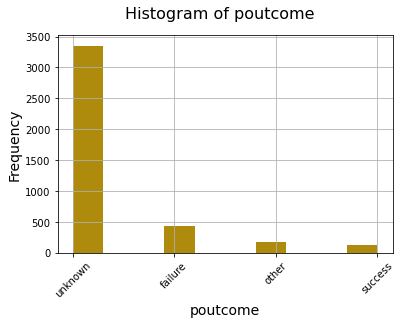

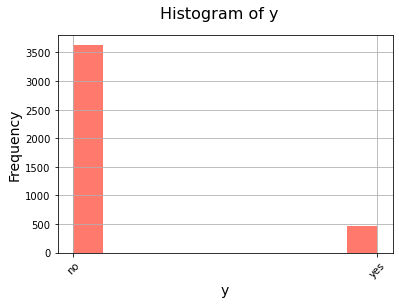

In [314]:
counter = 0
colors = ['#98f5ff', '#1cc32f', '#FF4040', '#9a34b5', '#b5347e', '#1691a7', '#e5d700', '#de6722', '#8B4513', '#C1FFC1'
          , '#ae8b0c', '#ff796c']
for column in df:
    plt.figure() 
    plt.ylabel('Frequency', fontsize = 14)
    plt.xlabel(column, fontsize = 14)
    plt.suptitle('Histogram of ' + column, fontsize = 16)
    df[column].hist(color = colors[counter])
    plt.xticks(rotation = 45)
    counter += 1
         

### Question 9
One way to improve data for machine learning models is to normalize data. In this exercise for every column, we subtract the desired data from the average and finally divide it by the standard deviation.

In [315]:
pd.set_option('mode.chained_assignment', None)

for column in df:
    if df[column].dtypes != object and column != 'marital' and column != '':
        df[column] = (df[column] - df[column].mean()) / df[column].std() 
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,-1.154366,unemployed,2.0,primary,0.255388,no,no,-0.724620,-0.573012,-0.404051,unknown,no
1,-0.856422,services,2.0,secondary,1.406374,yes,yes,-0.005131,-0.573012,3.031432,failure,no
2,-0.000582,management,1.0,tertiary,-0.378000,yes,no,-0.313979,-0.573012,2.940492,failure,no
3,-1.154366,management,2.0,tertiary,0.136148,yes,yes,-0.259744,0.380660,-0.404051,unknown,no
4,1.725758,blue-collar,2.0,secondary,0.006078,yes,no,-0.155147,-0.573012,-0.404051,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.856422,services,2.0,secondary,-0.557434,yes,no,0.243872,0.698550,-0.404051,unknown,no
4517,1.527129,self-employed,2.0,tertiary,-1.699986,yes,yes,-0.437946,-0.573012,-0.404051,unknown,no
4518,1.527129,technician,2.0,secondary,-0.316655,no,no,-0.445694,2.605894,-0.404051,unknown,no
4519,-1.352996,blue-collar,2.0,secondary,0.006173,no,no,-0.530922,0.380660,1.738074,other,no


In [316]:
df.describe()

,age,marital,balance,duration,campaign,pdays
count,4.087000e+03,4087.000000,4.087000e+03,4.087000e+03,4.087000e+03,4.087000e+03
mean,8.955088e-15,1.517250,1.410702e-15,1.073537e-15,-5.643611e-16,-1.782007e-16
std,1.000000e+00,0.688791,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.246827e+00,0.000000,-1.699986e+00,-1.015168e+00,-5.730120e-01,-4.040508e-01
25%,-8.564225e-01,1.000000,-4.033047e-01,-6.200229e-01,-5.730120e-01,-4.040508e-01
50%,-5.815929e-04,2.000000,-2.848321e-01,-2.829876e-01,-2.551214e-01,-4.040508e-01
75%,6.332970e-01,2.000000,6.077740e-03,2.341872e-01,6.276920e-02,-4.040508e-01
max,4.506568e+00,2.000000,2.686419e+01,1.068809e+01,1.500363e+01,8.406951e+00


### Question 10
In this part first, for both cases in which the user has registered the term deposit or not, we obtain and save the average and standard deviation. Then we use the *scipy.stats()* function of the Probability Density (PDF) function to draw the normal distribution of the attribute corresponding to the mean and standard deviation you obtained.

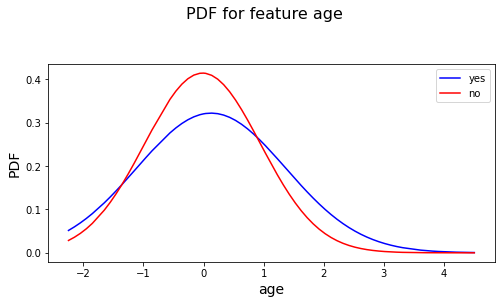

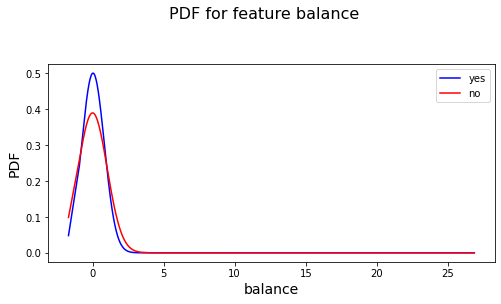

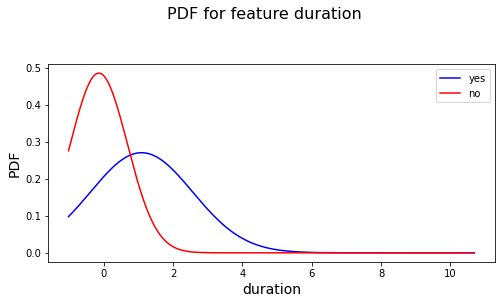

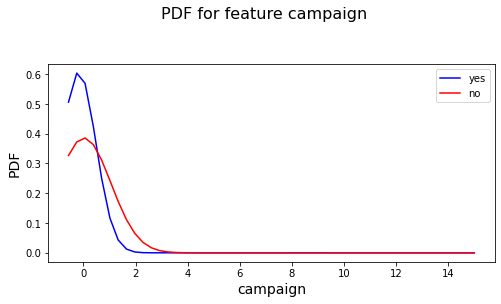

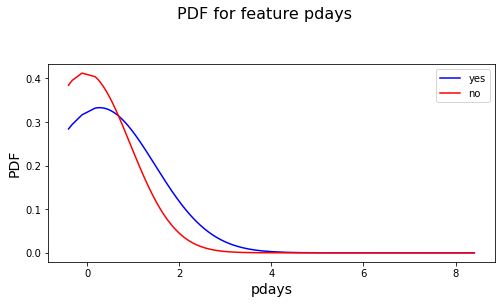

In [317]:
for column in df:
    if df[column].dtypes != object and column != 'marital' and column != '': 
        yes_mean = df[(df['y'] == 'yes')][column].mean()    
        yes_std = df[(df['y'] == 'yes')][column].std()
        no_mean = df[(df['y'] == 'no')][column].mean()    
        no_std = df[(df['y'] == 'no')][column].std() 
        yes_pdf = norm(yes_mean, yes_std).pdf(df[column].sort_values())
        no_pdf = norm(no_mean, no_std).pdf(df[column].sort_values())
        fig = plt.figure(figsize=(8, 8))
        ax1 = fig.add_subplot(211) 
        ax1.plot(df[column].sort_values(), yes_pdf, 'b', label="yes")
        ax1.plot(df[column].sort_values(), no_pdf , 'r', label="no")
        ax1.legend(loc=1)
        plt.ylabel('PDF', fontsize = 14)
        plt.xlabel(column, fontsize = 14)
        plt.suptitle('PDF for feature ' + column, fontsize = 16)
        plt.show()

We choose the `duration` feature as the model input because according to the corresponding diagram, this feature can better distinguish between *Yes* and *No*.

### Question 11
Now to find the intersection of two curves, we use the `Shapel` library for geometry-related calculations. To do this, we create a `LineString` from each line and obtain their `intersection` as follows:

In [318]:
yes_line = LineString(np.column_stack((df['duration'].sort_values(), norm(df[(df['y'] == 'yes')]['duration'].mean() , df[(df['y'] == 'yes')]['duration'].std()).pdf(df['duration'].sort_values()))))
no_line = LineString(np.column_stack((df['duration'].sort_values(), norm(df[(df['y'] == 'no')]['duration'].mean() , df[(df['y'] == 'no')]['duration'].std()).pdf(df['duration'].sort_values()))))
intersection = yes_line.intersection(no_line)

To get the *x* and *y* values as NumPy arrays if an intersection is only one point, we would just write: 

In [319]:
feature, p = intersection.xy
feature[0]

0.7681346965513345

At last we calculate the `y` for the test data using classification model. First we normalize the *duration* column of the *NaN_df* ,  then we predict the appropriate class(yes/no).

In [320]:
NaN_df['duration'] = (NaN_df['duration'] - NaN_df['duration'].mean()) / NaN_df['duration'].std() 
NaN_df.loc[(NaN_df['duration'] <= feature[0]), "y"] = "no"
NaN_df.loc[(NaN_df['duration'] > feature[0]), "y"] = "yes"
NaN_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,2.0,tertiary,1235.0,no,no,0.410199,3,-1,unknown,no
38,33.00000,management,2.0,secondary,3935.0,yes,no,2.067139,1,342,failure,yes
54,41.61747,blue-collar,2.0,secondary,2231.0,yes,no,0.079617,3,-1,unknown,no
65,51.00000,blue-collar,0.0,secondary,23.0,yes,no,-0.476728,1,170,failure,no
89,41.61747,blue-collar,2.0,secondary,1831.0,yes,no,-0.198556,2,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,1.0,tertiary,1166.0,yes,no,-0.182430,1,-1,unknown,no
4471,59.00000,management,2.0,unknown,3534.0,no,no,-0.146146,4,-1,unknown,no
4473,33.00000,technician,2.0,secondary,479.0,yes,no,-0.464634,1,272,failure,no
4477,32.00000,management,1.0,tertiary,577.0,no,no,-0.609767,2,-1,unknown,no


In [321]:
print(NaN_df['y'].value_counts())

no     375
yes     59
Name: y, dtype: int64


#### Storing Prediction Result in a File
Finaly we write the prediction result in the *prediction_result.csv* file using to_csv() function.

In [322]:
NaN_df.to_csv("prediction_result.csv")

#### The End.